In [2]:
import pandas as pd
import re
import numpy as np
from flask import Flask,jsonify
from flask import request
from flasgger import Swagger,LazyString,LazyJSONEncoder
from flasgger import swag_from
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv', encoding='latin1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [4]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(13169, 13)

In [10]:
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [6]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


PRE-PROCESSING 1. DROP DUPLIKAT

In [11]:
df.duplicated().sum()

125

In [7]:
# Drop Duplikat
df2 = df.drop_duplicates()
df2

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df2.shape

#sebelum drop duplikat ada 13169 Row
#setelah drop duplikat ada 13044 Row

#jadi jumlah duplikat = 125 row

(13044, 13)

PRE-PROCESSING 2. LOWER-CASING

PRE-PROCESSING 3. MENGHILANGKAN KARAKTER SELAIN ALFA-NUMERIK 

PRE-PROCESSING 4. MENGHILANGKAN URL

PRE-PROCESSING 5. MENGHILANGKAN KATA "RETWEET"

PRE-PROCESSING 6. MENORMALISASI KATA TIDAK BAKU

EDA 1 . HITUNG PANJANG KARAKTER DAN JUMLAH KATA (TAMBAH KOLOM "panjang_karakter" dan KOLOM "jumlah_kata")

In [13]:
# Hitung panjang karakter dan buat kolom untuk itu
df['panjang_karakter'] = df.Tweet.apply(len)

In [14]:
# Hitung Jumlah Kata dan buat kolom untuk itu
df['jumlah_kata'] = df.Tweet.apply(lambda sent: len(sent.split()))

In [15]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,panjang_karakter,jumlah_kata
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


EDA 2. DESKRIPSI STATISTIK

In [19]:
# MeAN (Rerata)
print (df['panjang_karakter'].mean())

print (df['jumlah_kata'].mean())

114.20274887994533
17.282101905991343


In [20]:
# Median (nilai tengah)
print (df['panjang_karakter'].median())

print (df['jumlah_kata'].median())


100.0
15.0


In [21]:
# RANGE (perbedaan nilai terbesar dan terkecil pada data)
range_panjang_karakter = df.panjang_karakter.max() - df.panjang_karakter.min()
print (range_panjang_karakter)

range_jumlah_kata = df.jumlah_kata.max() - df.jumlah_kata.min()
print (range_jumlah_kata)

557
51


In [25]:
# PANJANG KARAKTER
# mencari nilai minimum dan maksimum
p0 = df.panjang_karakter.min()

p100 = df.panjang_karakter.max()

# Quartile 1
q1 = df.panjang_karakter.quantile(0.25)

# Quartile 2
q2 = df.panjang_karakter.quantile(0.50)

# Quartile 3
q3 = df.panjang_karakter.quantile(0.75)

# Cari IQR
iqr = q3 - q1

# batas bawah
lower_limit = q1-1.5*iqr

# batas atas
upper_limit = q3+1.5*iqr

# menentukan batas outlier dari data yg kita punya
print("Batas bawah total char:", lower_limit)
print("Nilai minimum:", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("Batas atas total char:", upper_limit)
print("Nilai maksimum:", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

print()

print(q1)
print(q2)
print(q3)

# nb : outlier adalah nilai data yg melebihi batas tertentu suatu variabel atau kolom

Batas bawah total char: -80.5
Nilai minimum: 4
Tidak ada outlier dari sisi batas bawah

Batas atas total char: 291.5
Nilai maksimum: 561
Ada outlier dari sisi batas atas

59.0
100.0
152.0


In [24]:
# jumlah kata
# mencari nilai minimum dan maksimum
p0 = df.jumlah_kata.min()

p100 = df.jumlah_kata.max()

# Quartile 1
q1 = df.jumlah_kata.quantile(0.25)

# Quartile 2
q2 = df.jumlah_kata.quantile(0.50)

# Quartile 3
q3 = df.jumlah_kata.quantile(0.75)

# Cari IQR
iqr = q3 - q1

# batas bawah
lower_limit = q1-1.5*iqr

# batas atas
upper_limit = q3+1.5*iqr

# menentukan batas outlier dari data yg kita punya
print("Batas bawah jumlah_kata:", lower_limit)
print("Nilai minimum:", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("Batas atas total char:", upper_limit)
print("Nilai maksimum:", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

print()

print(q1)
print(q2)
print(q3)
# nb : outlier adalah nilai data yg melebihi batas tertentu suatu variabel atau kolom

Batas bawah jumlah_kata: -12.0
Nilai minimum: 1
Tidak ada outlier dari sisi batas bawah

Batas atas total char: 44.0
Nilai maksimum: 52
Ada outlier dari sisi batas atas

9.0
15.0
23.0


EDA 3. KOMPOSISI TWWET YANG MENGANDUNG HATE SPEECH

<Axes: ylabel='HS'>

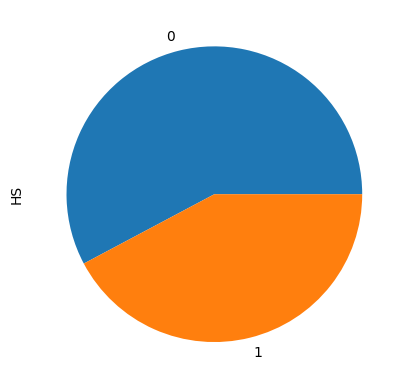

In [26]:
# PIE CHART
df.groupby('HS').HS.count().plot(kind='pie')

EDA 4. WORDCLOUD - MELIHAT KATA YANG SERING DIGUNAKAN 

In [41]:
def preprocess(TeksProses):

  
    #Lowercasing- Membuat semua huruf menjadi huruf kecil 
    text = TeksProses.lower()

    #menghilangkan karakter non-alfa numerik
    text = re.sub('[^0-9a-zA-Z]+',' ',text)

    # menghilangkan karakter yang tidak penting
    text=re.sub('\n',' ',text) #Menghilangkan new line pada data
    text=re.sub('rt',' ',text) #Menghilangkan kata-kata retweet 
    text=re.sub('user',' ',text) #Menghilangkan kata-kata user
    text=re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) #Menghilangkan  URL
    text=re.sub(' +',' ',text) #Menghilangkan ekstra spasi

   
    return text


In [42]:
df['Tweet']= df['Tweet'].apply(preprocess)

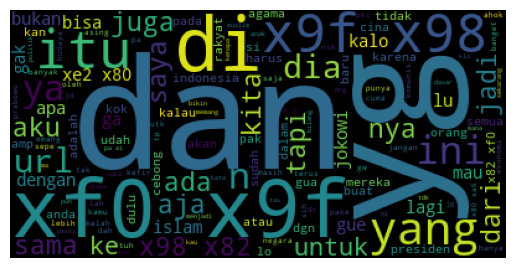

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ' '.join(df['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
df3 = pd.read_csv('Proses_Kata.csv', encoding='latin1')
df3

,id,teks_asli,teks_setelah_cleansing
0,1,di ujung jalan ada bencong gila tuh,di ujung jalan ada ***disensor*** ***disensor*...
1,2,sebel banget masa adek gw dikatain bego,kesal banget masa adik gue diejek ***disensor***
2,3,dih hari gini masih berantem tuh si cebong n k...,ih hari begini masih bertengkar itu sih ***dis...
3,4,gaes nonton film yok,guys menonton film ayo
4,5,yaelah gitu aja bete,yaelah begitu saja sebal
5,6,"jangan molor aja kerjaan lo, ngapain kek gitu",jangan molor saja pekerjaan kamu apa kayak begitu
6,7,ya ampuuuun tuh anjing lucu banget,ya ampuuuun itu ***disensor*** lucu banget
7,8,anjingnya lucu yaa,anjingnya lucu ya
8,9,anjingnya ucul yaa,anjingnya lucu ya
